In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime


# 1. Data Collection

In [25]:


now = datetime.now()
start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'

df = yf.download(ticker, start, end)

df



[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-04,28.742268,29.159893,28.644003,28.920930,203953200
2015-05-05,28.094625,28.686443,28.090158,28.619444,197085600
2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000
2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600
2015-05-08,28.620127,28.620127,28.281493,28.409321,222201600
...,...,...,...,...,...
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600


In [26]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [27]:
#Now we need to remove this multi index column as we dont need it.

# Flatten the MultiIndex columns if needed
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]

In [28]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2015-05-04,28.742268,29.159893,28.644003,28.920930,203953200
2015-05-05,28.094625,28.686443,28.090158,28.619444,197085600
2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000
2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600
2015-05-08,28.620127,28.620127,28.281493,28.409321,222201600
...,...,...,...,...,...
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600
2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500


# 2.Data Exploration and Visualization

In [29]:
df


,Close,High,Low,Open,Volume
Date,,,,,
2015-05-04,28.742268,29.159893,28.644003,28.920930,203953200
2015-05-05,28.094625,28.686443,28.090158,28.619444,197085600
2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000
2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600
2015-05-08,28.620127,28.620127,28.281493,28.409321,222201600
...,...,...,...,...,...
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600
2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500


In [30]:
type(df)

pandas.core.frame.DataFrame

In [31]:
df.shape

(2516, 5)

In [32]:
df.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [33]:
df.describe()

,Close,High,Low,Open,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,100.645905,101.653199,99.522945,100.542423,1.116817e+08
std,68.430337,69.100349,67.658701,68.341219,6.471798e+07
min,20.674536,20.978911,20.475435,20.596728,2.323470e+07
25%,37.370717,37.630403,36.970684,37.306490,6.843475e+07
50%,77.180470,77.758609,76.462638,77.070584,9.603795e+07
75%,160.147236,161.867187,157.238318,159.657943,1.361035e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [34]:
df.dtypes

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [35]:
df.reset_index(inplace=True)

In [36]:
df

,Date,Close,High,Low,Open,Volume
0,2015-05-04,28.742268,29.159893,28.644003,28.920930,203953200
1,2015-05-05,28.094625,28.686443,28.090158,28.619444,197085600
2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600
4,2015-05-08,28.620127,28.620127,28.281493,28.409321,222201600
...,...,...,...,...,...,...
2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600
2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500
2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700


In [37]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

Text(0, 0.5, 'Close price')

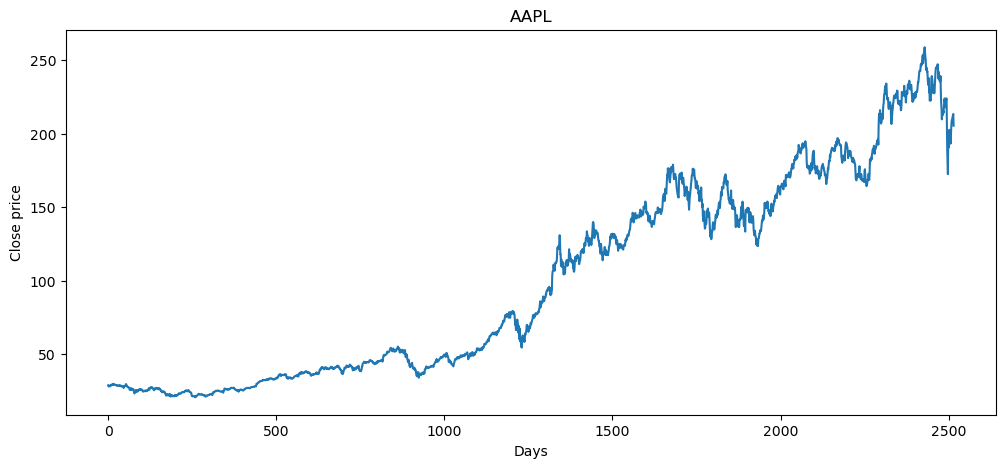

In [38]:
plt.figure(figsize=(12, 5))
plt.plot(df.index,df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# 3.Feature Engineering

In [39]:
tempdf = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
tempdf

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [40]:
# 5days moving average
tempdf['MA_5'] = tempdf.rolling(5).mean()
tempdf


,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 Days Moving Average

In [41]:
df['MA_100'] = df.Close.rolling(100).mean()
df

,Date,Close,High,Low,Open,Volume,MA_100
0,2015-05-04,28.742268,29.159893,28.644003,28.920930,203953200,NaN
1,2015-05-05,28.094625,28.686443,28.090158,28.619444,197085600,NaN
2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000,NaN
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600,NaN
4,2015-05-08,28.620127,28.620127,28.281493,28.409321,222201600,NaN
...,...,...,...,...,...,...,...
2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100,229.250193
2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600,228.969025
2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500,228.670190
2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700,228.375959


In [42]:
df.head(100)

,Date,Close,High,Low,Open,Volume,MA_100
0,2015-05-04,28.742268,29.159893,28.644003,28.920930,203953200,NaN
1,2015-05-05,28.094625,28.686443,28.090158,28.619444,197085600,NaN
2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000,NaN
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600,NaN
4,2015-05-08,28.620127,28.620127,28.281493,28.409321,222201600,NaN
...,...,...,...,...,...,...,...
95,2015-09-17,25.663401,26.242359,25.618346,26.055382,256450400,NaN
96,2015-09-18,25.557520,25.749006,25.201586,25.278179,297141200,NaN
97,2015-09-21,25.954004,25.990049,25.604828,25.607080,200888000,NaN
98,2015-09-22,25.546257,25.721972,25.348013,25.541751,201384800,NaN


Text(0, 0.5, 'Price')

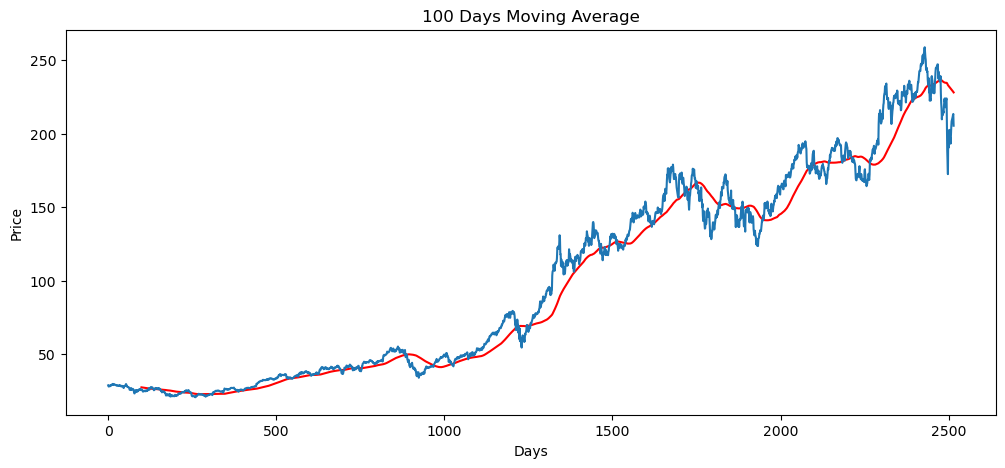

In [43]:
plt.figure(figsize=(12, 5))
plt.plot(df['MA_100'], 'r')
plt.plot(df.Close)
plt.title("100 Days Moving Average")
plt.xlabel('Days')
plt.ylabel('Price')

### 200 days Moving Average

In [44]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2015-05-04,28.742268,29.159893,28.644003,28.920930,203953200,NaN,NaN
1,2015-05-05,28.094625,28.686443,28.090158,28.619444,197085600,NaN,NaN
2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000,NaN,NaN
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600,NaN,NaN
4,2015-05-08,28.620127,28.620127,28.281493,28.409321,222201600,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-02-16,21.982466,22.030234,21.520707,21.613968,196231600,24.652620,NaN
199,2016-02-17,22.319115,22.339586,21.871003,21.989286,179452800,24.618276,26.011168
200,2016-02-18,21.896027,22.494266,21.857356,22.482892,156084000,24.578169,25.976937
201,2016-02-19,21.845984,22.009760,21.791392,21.836885,141496800,24.538215,25.945694


Text(0, 0.5, 'Price')

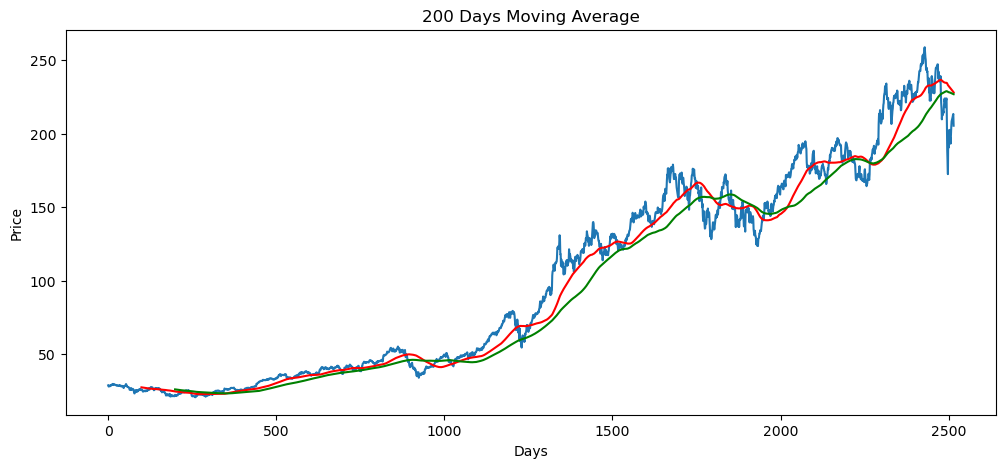

In [45]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

#### Calculating % changed in each trading session

In [46]:
df

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2015-05-04,28.742268,29.159893,28.644003,28.920930,203953200,NaN,NaN
1,2015-05-05,28.094625,28.686443,28.090158,28.619444,197085600,NaN,NaN
2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000,NaN,NaN
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600,NaN,NaN
4,2015-05-08,28.620127,28.620127,28.281493,28.409321,222201600,NaN,NaN
...,...,...,...,...,...,...,...,...
2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100,229.250193,227.195553
2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600,228.969025,227.117564
2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500,228.670190,227.031225
2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700,228.375959,226.929751


In [47]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]


,Close,Percentage Changed
0,28.742268,NaN
1,28.094625,-0.022533
2,27.918190,-0.006280
3,28.090876,0.006185
4,28.620127,0.018841
...,...,...
2511,210.139999,0.004109
2512,211.210007,0.005092
2513,212.500000,0.006108
2514,213.320007,0.003859


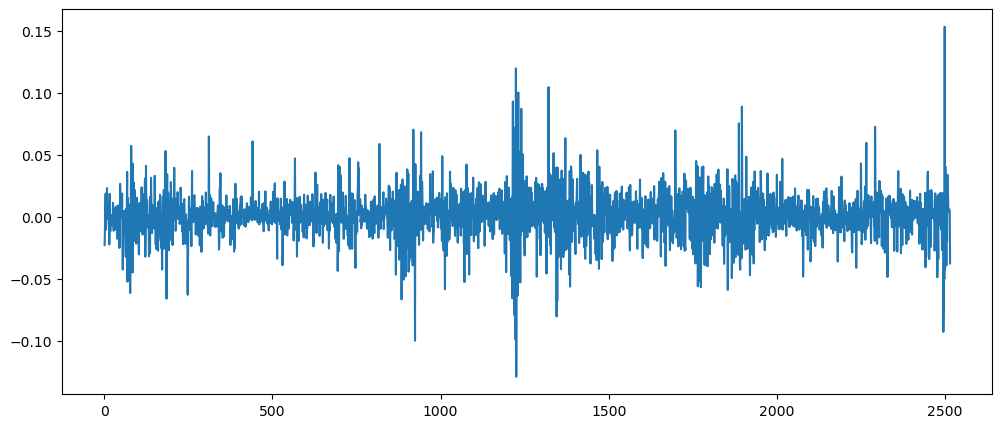

In [48]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])

In [49]:
df

,Date,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage Changed
0,2015-05-04,28.742268,29.159893,28.644003,28.920930,203953200,NaN,NaN,NaN
1,2015-05-05,28.094625,28.686443,28.090158,28.619444,197085600,NaN,NaN,-0.022533
2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000,NaN,NaN,-0.006280
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600,NaN,NaN,0.006185
4,2015-05-08,28.620127,28.620127,28.281493,28.409321,222201600,NaN,NaN,0.018841
...,...,...,...,...,...,...,...,...,...
2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100,229.250193,227.195553,0.004109
2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600,228.969025,227.117564,0.005092
2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500,228.670190,227.031225,0.006108
2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700,228.375959,226.929751,0.003859


# 4.Data Preprocessing

In [50]:
df.shape

(2516, 9)

In [51]:
# Splitting data into Training & Testing datasets
data_training = pd.DataFrame(df.Close[0 : int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])


In [52]:
data_training

,Close
0,28.742268
1,28.094625
2,27.918190
3,28.090876
4,28.620127
...,...
1756,159.210205
1757,160.282837
1758,154.299805
1759,154.073471


In [53]:
data_testing

,Close
1761,155.136246
1762,155.441330
1763,156.937088
1764,163.372787
1765,154.270279
...,...
2511,210.139999
2512,211.210007
2513,212.500000
2514,213.320007


In [54]:
# Scaling down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [55]:

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05099531],
       [0.04690163],
       [0.0457864 ],
       ...,
       [0.84463165],
       [0.84320102],
       [0.88717734]])

In [56]:

data_training_array.shape

(1761, 1)

# 5.Sequence creation

In [57]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


x_train, y_train = np.array(x_train), np.array(y_train)

In [58]:
x_train

array([[[0.05099531],
        [0.04690163],
        [0.0457864 ],
        ...,
        [0.03337098],
        [0.03079365],
        [0.0321037 ]],

       [[0.04690163],
        [0.0457864 ],
        [0.04687793],
        ...,
        [0.03079365],
        [0.0321037 ],
        [0.03307199]],

       [[0.0457864 ],
        [0.04687793],
        [0.05022327],
        ...,
        [0.0321037 ],
        [0.03307199],
        [0.03265905]],

       ...,

       [[0.8929017 ],
        [0.88662758],
        [0.87469999],
        ...,
        [0.90446924],
        [0.87566979],
        [0.88244978]],

       [[0.88662758],
        [0.87469999],
        [0.89631861],
        ...,
        [0.87566979],
        [0.88244978],
        [0.84463165]],

       [[0.87469999],
        [0.89631861],
        [0.93272202],
        ...,
        [0.88244978],
        [0.84463165],
        [0.84320102]]])

In [59]:
x_train.shape

(1661, 100, 1)

In [60]:
y_train.shape

(1661,)

# 6.Model Building

In [61]:

import tensorflow as tf
print(tf.__version__)

2.19.0


In [62]:

# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [63]:

model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7.Model Training

In [64]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0493
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.1191e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.5325e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.6912e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.6238e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.7745e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.0989e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.0939e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.1773e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.2947e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.8102e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.4392e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.9033e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.5738e-04
Epoch 15/50
52/52 ━

In [65]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [66]:

# Save the trained model
model.save('stock_prediction_model.keras')

# 8.Preparing the Test data

In [67]:
data_testing

,Close
1761,155.136246
1762,155.441330
1763,156.937088
1764,163.372787
1765,154.270279
...,...
2511,210.139999
2512,211.210007
2513,212.500000
2514,213.320007


In [68]:
data_training.tail(100)

,Close
1661,162.476959
1662,168.236176
1663,172.069061
1664,171.558044
1665,176.363937
...,...
1756,159.210205
1757,160.282837
1758,154.299805
1759,154.073471


In [69]:

past_100_days = data_training.tail(100)

In [70]:

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

,Close
0,162.476959
1,168.236176
2,172.069061
3,171.558044
4,176.363937
...,...
850,210.139999
851,211.210007
852,212.500000
853,213.320007


In [71]:

input_data = scaler.fit_transform(final_df)
# input_data

In [72]:

input_data.shape

(855, 1)

In [73]:

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [74]:

x_test, y_test = np.array(x_test), np.array(y_test)

In [75]:
x_test[0].shape

(100, 1)

In [76]:

x_test

array([[[0.28777779],
        [0.33039054],
        [0.35875027],
        ...,
        [0.22727457],
        [0.22559992],
        [0.27707729]],

       [[0.33039054],
        [0.35875027],
        [0.35496923],
        ...,
        [0.22559992],
        [0.27707729],
        [0.23346345]],

       [[0.35875027],
        [0.35496923],
        [0.39052829],
        ...,
        [0.27707729],
        [0.23346345],
        [0.23572078]],

       ...,

       [[0.87901062],
        [0.88167135],
        [0.88189309],
        ...,
        [0.63407602],
        [0.64043921],
        [0.64835626]],

       [[0.88167135],
        [0.88189309],
        [0.88041488],
        ...,
        [0.64043921],
        [0.64835626],
        [0.65790099]],

       [[0.88189309],
        [0.88041488],
        [0.90931349],
        ...,
        [0.64835626],
        [0.65790099],
        [0.66396827]]])

## 9.Making Predictions

In [77]:

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step 


In [78]:
y_predicted

array([[0.24488634],
       [0.24198069],
       [0.23859294],
       [0.23946016],
       [0.25633758],
       [0.25242543],
       [0.24469142],
       [0.22613853],
       [0.21494272],
       [0.19221601],
       [0.16455653],
       [0.15230784],
       [0.145627  ],
       [0.15046643],
       [0.14141294],
       [0.12336902],
       [0.10741454],
       [0.10677125],
       [0.1067331 ],
       [0.10733058],
       [0.11429283],
       [0.13341953],
       [0.15052934],
       [0.16190514],
       [0.17302941],
       [0.16849954],
       [0.16116351],
       [0.15990788],
       [0.15951343],
       [0.14875951],
       [0.12662144],
       [0.09676646],
       [0.07383864],
       [0.06406269],
       [0.05217526],
       [0.04521641],
       [0.04957185],
       [0.05653007],
       [0.06817207],
       [0.08514237],
       [0.09990554],
       [0.1017478 ],
       [0.10147768],
       [0.09550639],
       [0.09305409],
       [0.09748311],
       [0.1060183 ],
       [0.120

In [79]:

y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

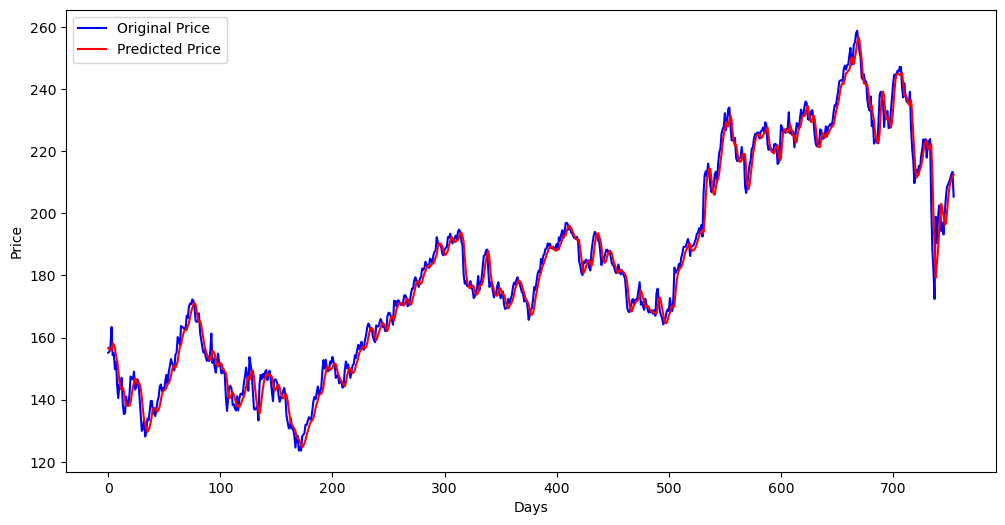

In [80]:

plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()


(160.0, 260.0)

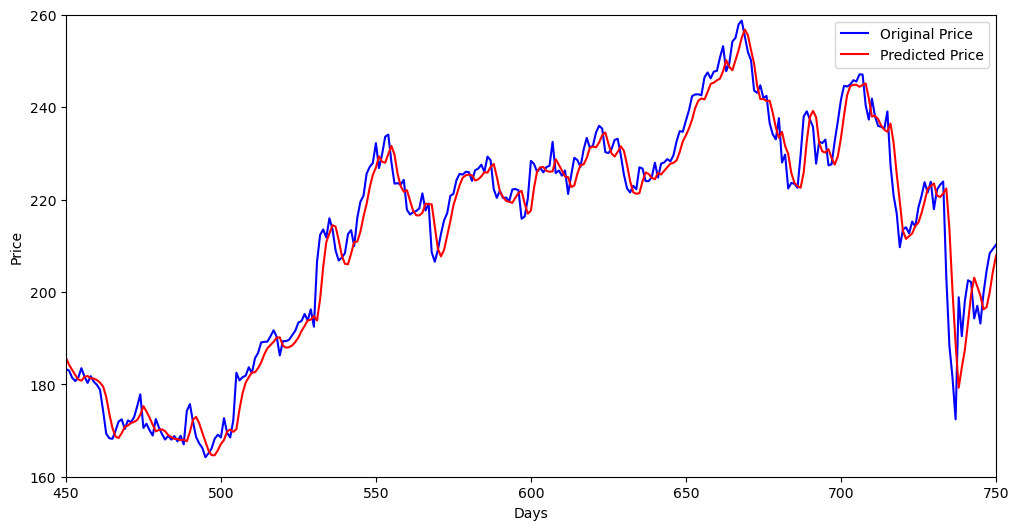

In [84]:

plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(160, 260)

# 10.Model Evaluation

In [85]:

# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score


In [86]:

mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 16.471800466302152


In [87]:

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 4.05854659530997


In [88]:

# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.984806557677125
